In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [29]:
# Olá, pra você que está lendo este trabalho, estaremos lidando aqui com um cenário bastante atual. Analisaremos uma database de casos de covid-19 no Brasil focando nas cidades de Recife e São Paulo.

In [30]:
# importando os dados
covid = pd.read_csv(r'caso.csv', encoding = "utf-8")

In [31]:
# pegando apenas os dados de Recife, resetando o index e observando as colunas
covidRecife = covid[covid.city == 'Recife'].sort_values(by=['date'], ascending=True)
covidRecife.reset_index(inplace=True, drop=True)
covidRecife.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-03-12,PE,Recife,city,2,0,1,False,1645727.0,2611606.0,0.12153,0.0
1,2020-03-13,PE,Recife,city,2,0,2,False,1645727.0,2611606.0,0.12153,0.0
2,2020-03-14,PE,Recife,city,6,0,3,False,1645727.0,2611606.0,0.36458,0.0
3,2020-03-15,PE,Recife,city,7,0,4,False,1645727.0,2611606.0,0.42534,0.0
4,2020-03-17,PE,Recife,city,13,0,5,False,1645727.0,2611606.0,0.78992,0.0


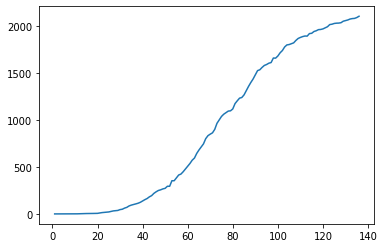

In [32]:
# vamos olhar agora a evolução no número de mortes em Recife
plt.plot(covidRecife['order_for_place'], (covidRecife['deaths']))

In [33]:
#first try with a for loop
def sub_column_value(newcolumn, subcolumn, table):
    table[newcolumn] = 0
    for index, i in enumerate(subcolumn):
        if index > 0:
            table[newcolumn][index] = (subcolumn[index] - subcolumn[index-1])

sub_column_value('deaths_per_day', covidRecife.deaths, covidRecife)
         
covidRecife.tail()



,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818,10
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810,5
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807,2
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805,9
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803,14


<AxesSubplot:>

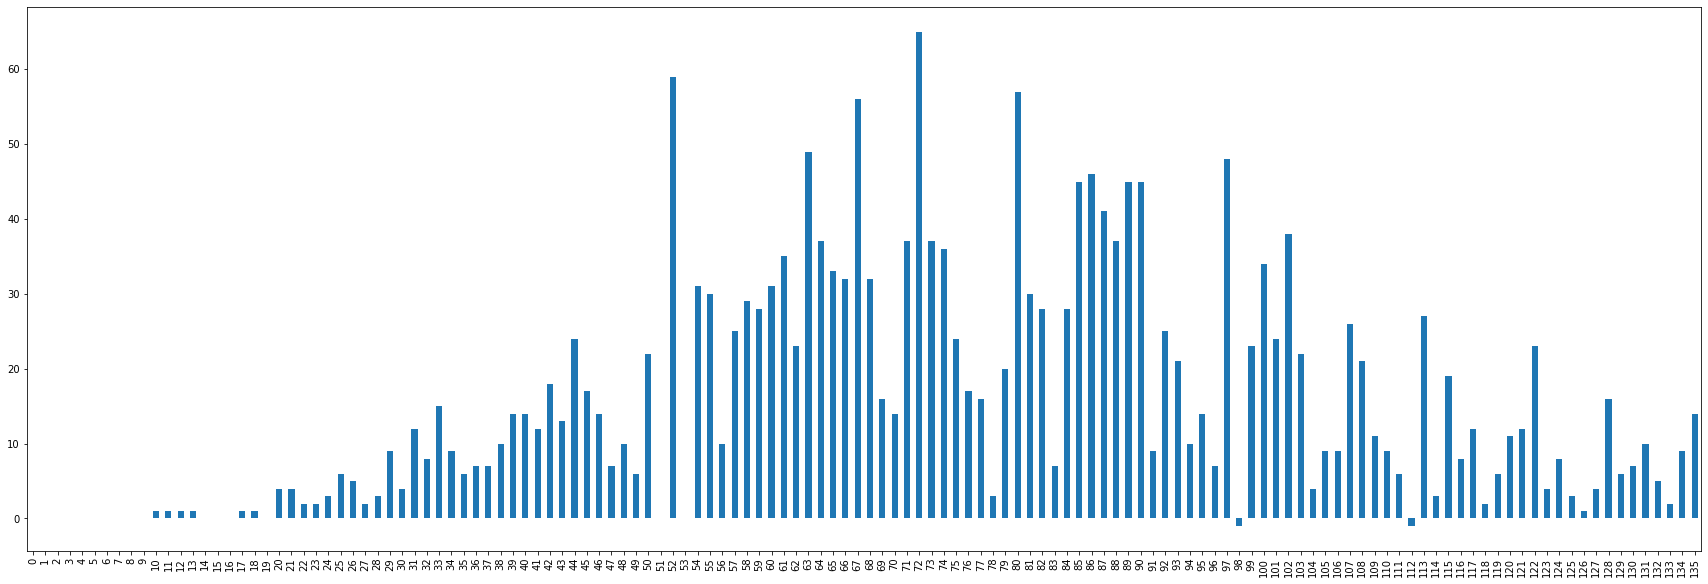

In [34]:
covidRecife['deaths_per_day'].plot(kind="bar", figsize=(30,10))

In [35]:
# pegando apenas os dados de São Paulo, resetando o index e observando as colunas
covidSP = covid[covid.city == 'São Paulo'].sort_values(by=['date'], ascending=True)
covidSP.reset_index(inplace=True, drop=True)
sub_column_value('deaths_per_day', covidSP.deaths, covidSP)         
covidSP.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day
0,2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,3550308.0,0.00816,0.0,0
1,2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,3550308.0,0.00816,0.0,0
2,2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,3550308.0,0.00816,0.0,0
3,2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,3550308.0,0.01632,0.0,0
4,2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,3550308.0,0.01632,0.0,0


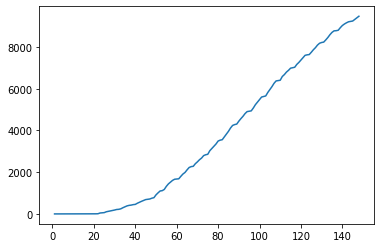

In [36]:
# vamos olhar agora a evolução no número de mortes em São Paulo
plt.plot(covidSP['order_for_place'], (covidSP['deaths']))

<AxesSubplot:>

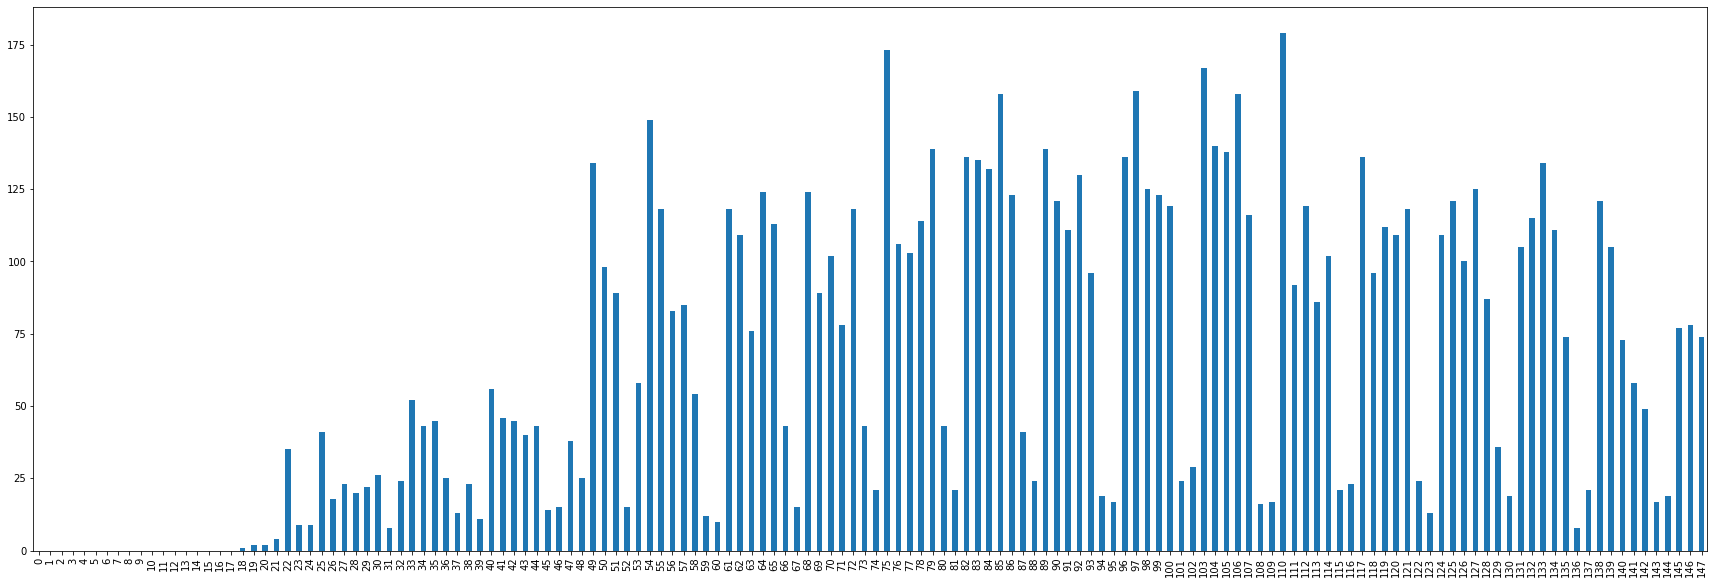

In [37]:
covidSP['deaths_per_day'].plot(kind="bar", figsize=(30,10))

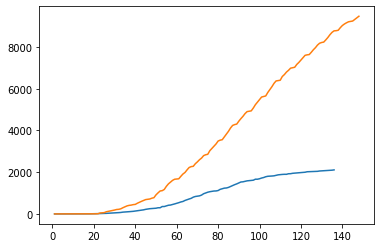

In [38]:
# comparação entre o número de mortes total em Recife (azul) e São Paulo (laranja)
plt.plot(covidRecife['order_for_place'], covidRecife['deaths'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths'], label="line 2")

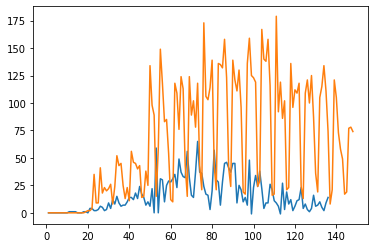

In [39]:
# comparação entre o número de mortes por dia em Recife (azul) e São Paulo (laranja)
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day'], label="line 1")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day'], label="line 2")

In [40]:
# não eh uma boa estrategia comparar o número de mortes em duas cidades com quantidades de habitantes discrepantes
# por isso estamos usando essas funções pra ter número de mortes a cada 1 milhao de habitantes

print("População de Recife: ", covidRecife.estimated_population_2019[0])
print("População de São Paulo: ", covidSP.estimated_population_2019[0])


def deaths_per_day_per_1kk(newcolumn, table):
    population_per_1kk = table.estimated_population_2019[0] / 1000000
    table[newcolumn] = table.deaths_per_day / population_per_1kk

def total_deaths_per_1kk(newcolumn, table):
    population_per_1kk = table.estimated_population_2019[0] / 1000000
    table[newcolumn] = table.deaths / population_per_1kk



In [41]:
#
deaths_per_day_per_1kk('deaths_per_day_per_1kk_inhabitants', covidRecife)
deaths_per_day_per_1kk('deaths_per_day_per_1kk_inhabitants', covidSP)


In [ ]:
total_deaths_per_1kk('deaths_per_1kk_inhabitants', covidRecife)
total_deaths_per_1kk('deaths_per_1kk_inhabitants', covidSP)

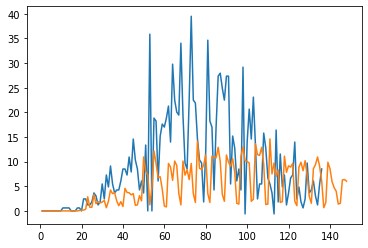

In [42]:
# linha azul => recife / linha laranja => São Paulo
plt.plot(covidRecife['order_for_place'], covidRecife['deaths_per_day_per_1kk_inhabitants'], label="Recife")
plt.plot(covidSP['order_for_place'], covidSP['deaths_per_day_per_1kk_inhabitants'], label="São Paulo")

In [56]:
covidRecife.tail()


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants
131,2020-07-25,PE,Recife,city,25429,2079,132,False,1645727.0,2611606.0,1545.15299,0.0818,10,6.076342
132,2020-07-26,PE,Recife,city,25740,2084,133,False,1645727.0,2611606.0,1564.05042,0.0810,5,3.038171
133,2020-07-27,PE,Recife,city,25857,2086,134,False,1645727.0,2611606.0,1571.15974,0.0807,2,1.215268
134,2020-07-28,PE,Recife,city,26011,2095,135,False,1645727.0,2611606.0,1580.51730,0.0805,9,5.468708
135,2020-07-29,PE,Recife,city,26277,2109,136,True,1645727.0,2611606.0,1596.68037,0.0803,14,8.506879


In [44]:
covidSP.describe()


,confirmed,deaths,order_for_place,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_day,deaths_per_day_per_1kk_inhabitants
count,148.000000,148.000000,148.000000,148.0,148.0,148.000000,148.000000,148.000000,148.000000
mean,60870.594595,3613.662162,74.500000,12252023.0,3550308.0,496.820766,0.057508,63.986486,5.222524
std,61514.761222,3238.064725,42.868014,0.0,0.0,502.078402,0.025278,52.180611,4.258938
min,1.000000,0.000000,1.000000,12252023.0,3550308.0,0.008160,0.000000,0.000000,0.000000
25%,6093.750000,418.750000,37.750000,12252023.0,3550308.0,49.736688,0.053100,17.000000,1.387526
50%,36059.500000,2845.500000,74.500000,12252023.0,3550308.0,294.314660,0.060900,47.500000,3.876911
75%,110975.750000,6606.000000,111.250000,12252023.0,3550308.0,905.774910,0.076325,113.250000,9.243371
max,193684.000000,9470.000000,148.000000,12252023.0,3550308.0,1580.832810,0.086500,179.000000,14.609832


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7c1dad3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7c1dade3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7c1dad3940>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7c1dadea60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7c1dadedc0>,
 'means': []}

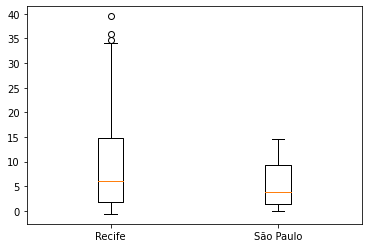

In [45]:
plt.boxplot([covidRecife.deaths_per_day_per_1kk_inhabitants, covidSP.deaths_per_day_per_1kk_inhabitants], labels=['Recife', 'São Paulo'])


In [46]:
# here i gathered the informations about deaths per day from both cities
crec_dp1kk = covidRecife.deaths_per_day_per_1kk_inhabitants[0:136:1]
csp_dp1kk = covidSP.deaths_per_day_per_1kk_inhabitants[0:136:1]

In [47]:
# here i concatenate both DataFrames and change the name of the tables using keys
df_rec_sp = pd.concat([crec_dp1kk, csp_dp1kk], axis=1, keys=['deaths_per_day_per_1kk_in_Recife', 'deaths_per_day_per_1kk_in_Sao_Paulo'])

In [48]:
df_rec_sp.describe()

,deaths_per_day_per_1kk_in_Recife,deaths_per_day_per_1kk_in_Sao_Paulo
count,136.000000,136.000000
mean,9.422798,5.263236
std,9.243379,4.360192
min,-0.607634,0.000000
25%,1.822903,1.285502
50%,6.076342,3.672863
75%,14.735129,9.406610
max,39.496223,14.609832


<AxesSubplot:>

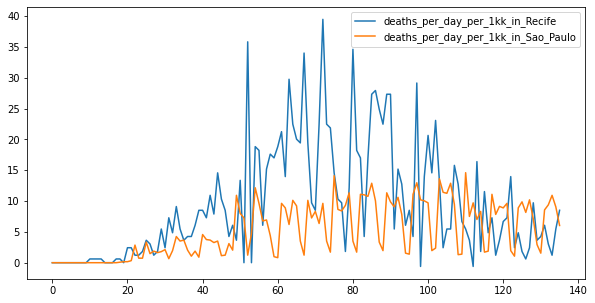

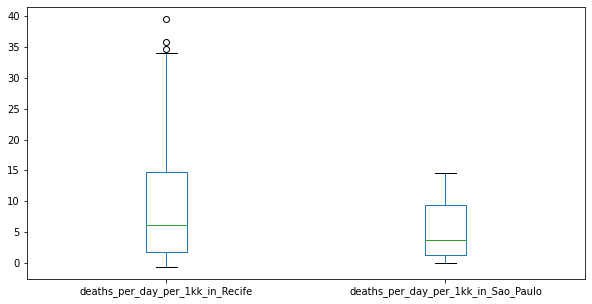

In [49]:
df_rec_sp.plot(kind='line', figsize=[10, 5])
df_rec_sp.plot(kind='box', figsize=[10, 5])

In [50]:
# check if the difference follows the gaussian
df_rec_sp['dpdp1kk_difference'] = df_rec_sp['deaths_per_day_per_1kk_in_Recife'] - df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo']

<AxesSubplot:ylabel='Frequency'>

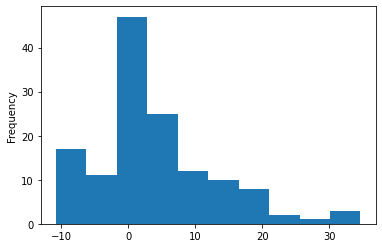

In [51]:
df_rec_sp['dpdp1kk_difference'].plot(kind='hist')

In [52]:
# Shapiro-Wilk normality test (value, p-value). Null hypothesis: the deaths in recife are not normally distributed.
stats.shapiro(df_rec_sp['dpdp1kk_difference'])

# a p-value less than the critical value shapiro => return (critical value, p-value) indicates that the null hypothesis was rejected

ShapiroResult(statistic=0.9259414672851562, pvalue=1.5152786545513663e-06)

In [53]:
# executing the t-test
stats.ttest_rel(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

Ttest_relResult(statistic=5.38246564972097, pvalue=3.158163070386272e-07)

<AxesSubplot:>

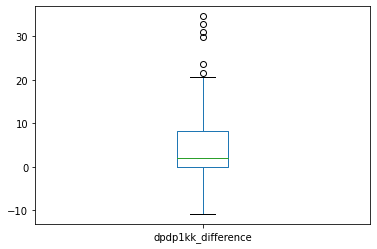

In [54]:
# checking symmetry
df_rec_sp['dpdp1kk_difference'].plot(kind='box')

In [55]:
stats.wilcoxon(df_rec_sp['deaths_per_day_per_1kk_in_Recife'], df_rec_sp['deaths_per_day_per_1kk_in_Sao_Paulo'])

WilcoxonResult(statistic=1913.0, pvalue=1.6211692977680056e-06)